## Summary
* Temperatures appear to peak between the 20 and 40 degree latitudes. 
* Wind speed is relatively independent of latitude. 75% of all cities had a wind speed less than 11.4 mph. 
* Humidity is also fairly independent of latitude, but the earth is a humid place. 75% of all the cities sampled had a humidity greater than 59%.


In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [123]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

## Perform API Calls

In [124]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Initialize pandas data frame with cities array
cities_df = pd.DataFrame(columns=['City','ID','Lat','Long','Temp','Humidity','Cloudiness','Wind Speed'])
cities_df['City'] = cities

# Build cities data frame
for index,row in cities_df.iterrows():
    
    # Add city to url
    url = base_url + "&q=" + row['City']
    
    # API response  
    try:
        response = requests.get(url).json()
        cities_df.loc[index,'ID'] = response['id'] 
        cities_df.loc[index,'Lat'] = response['coord']['lat'] 
        cities_df.loc[index,'Long'] = response['coord']['lon'] 
        cities_df.loc[index,'Temp'] = response['main']['temp_max'] 
        cities_df.loc[index,'Humidity'] = response['main']['humidity'] 
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all'] 
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        # Print log
        print(f"Name {row['City']}, ID {response['id']}")
    except:
       print(f"{row['City']} not found.")
             
# Drop any rows that are missing values
cities_df = cities_df.dropna(axis=0,how='any')
             
# Save city data to csv
cities_df.to_csv("global_weather_data.csv")

Name marzuq, ID 72181
Name yanji, ID 2033467
Name port blair, ID 1259385
taolanaro not found.
Name kapaa, ID 5848280
Name helong, ID 1808534
Name aksarka, ID 1512019
Name padang, ID 1633419
Name mataura, ID 6201424
Name ushuaia, ID 3833367
Name atuona, ID 4020109
Name bluff, ID 2175403
Name shingu, ID 1847947
Name arraial do cabo, ID 3471451
Name evensk, ID 2125693
Name busselton, ID 2075265
Name tuatapere, ID 2180815
Name kieta, ID 2094027
Name hilo, ID 5855927
Name hearst, ID 5973108
Name codrington, ID 2160063
Name punta arenas, ID 3874787
Name husavik, ID 5961417
Name adrar, ID 2508813
Name saint-philippe, ID 6138908
Name boissevain, ID 5905191
Name aljezur, ID 2271968
Name hobart, ID 2163355
aflu not found.
Name vaini, ID 1273574
Name sioux lookout, ID 6148373
Name rikitea, ID 4030556
Name ahipara, ID 2194098
Name birjand, ID 140463
Name lavrentiya, ID 4031637
Name tuktoyaktuk, ID 6170031
Name guerrero negro, ID 4021858
Name dikson, ID 1507390
Name palu, ID 1633034
Name soloneshno

In [125]:
cities_df.head()

,City,ID,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
0,marzuq,72181,14.4,46.47,86.32,18,100,4.83
1,yanji,2033467,42.89,129.5,58.69,93,92,2.04
2,port blair,1259385,11.67,92.75,83.71,94,80,12.88
4,kapaa,5848280,22.08,-159.32,80.6,78,90,17.22
5,helong,1808534,25.94,116.13,75.43,96,92,1.92


In [126]:
# Convert columns to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Long'] = pd.to_numeric(cities_df['Long'])
cities_df['Temp'] = pd.to_numeric(cities_df['Temp'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

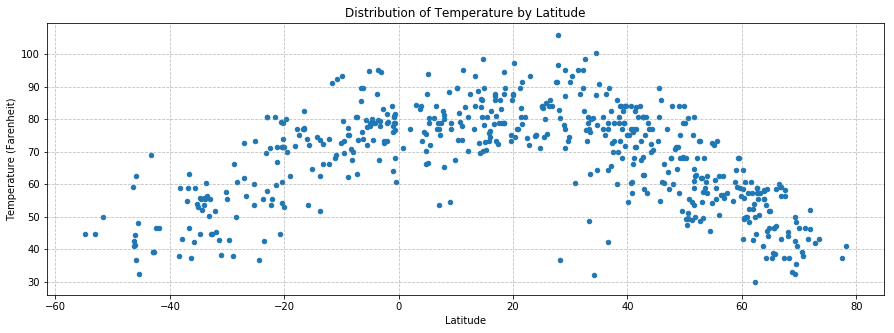

In [127]:
# Plot Temperature 
cities_df.plot(kind='scatter',x='Lat',y='Temp',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")
plt.title("Distribution of Temperature by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Temp Distribution.png")

# Show plot
plt.show()


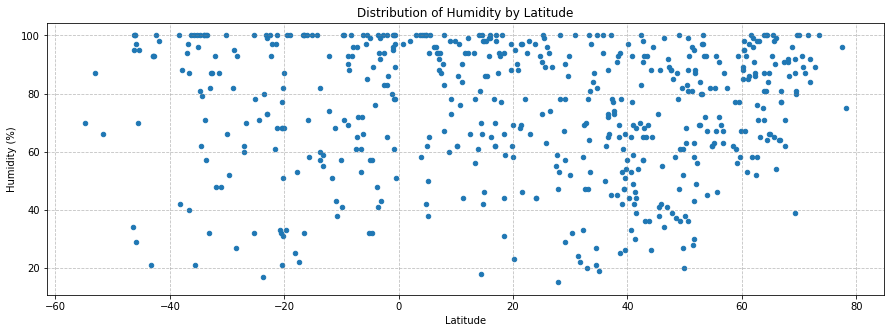

In [128]:
# Plot Humidity
cities_df.plot(kind='scatter',x='Lat',y='Humidity',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Distribution of Humidity by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Humidity Distribution.png")

# Show plot
plt.show()

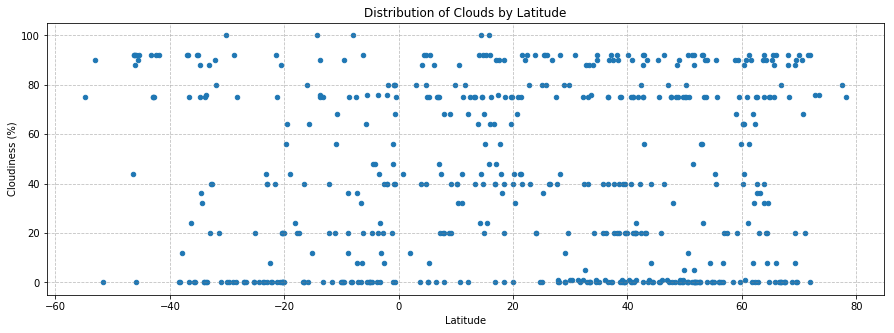

In [129]:
# Plot Cloudiness
cities_df.plot(kind='scatter',x='Lat',y='Cloudiness',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Distribution of Clouds by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Cloudiness Distribution.png")

# Show plot
plt.show()

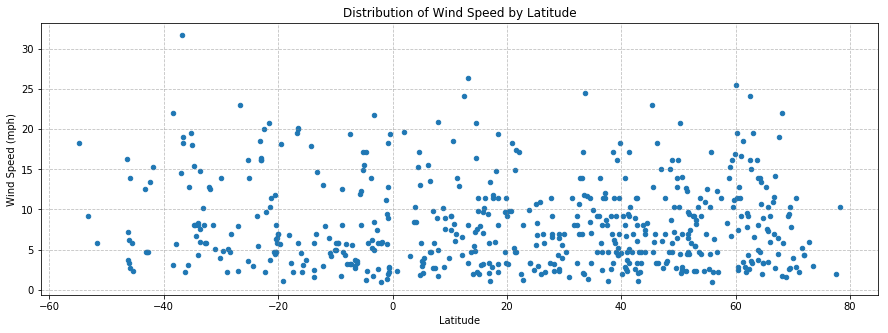

In [130]:
# Plot Wind Speed
cities_df.plot(kind='scatter',x='Lat',y='Wind Speed',figsize=(15, 5))

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Distribution of Wind Speed by Latitude")
plt.grid(True, linestyle='--', which='major',color='grey', alpha=.5)

# Save figure
plt.savefig("Wind Speed Distribution.png")

# Show plot
plt.show()

In [131]:
cities_df.describe()

,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,20.976268,19.337989,67.960091,74.248188,42.052536,8.124982
std,32.890444,91.959571,15.279482,22.501583,35.813174,5.388601
min,-54.810000,-173.230000,29.800000,15.000000,0.000000,0.920000
25%,-5.000000,-65.457500,56.395000,59.000000,0.000000,3.710000
50%,25.155000,22.605000,71.600000,78.000000,40.000000,6.930000
75%,49.222500,106.550000,79.030000,94.000000,75.000000,11.410000
max,78.220000,179.320000,105.800000,100.000000,100.000000,31.680000
